# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
from string import punctuation
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# change `data_location` to the location of the folder on your machine.
# data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"

data_location = "C:/Users/ahzha/Desktop/M1 Results"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter"
lyrics_folder = "lyrics"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [31]:
twitter_path = "C:/Users/ahzha/Desktop/M1 Results/twitter/"
files = [os.path.join(twitter_path,file) for file in os.listdir(twitter_path) if file.split('_')[-1].startswith('data')]

In [32]:
# Read in the twitter data
for file in files:
    if 'cher_followers' in file:
        df_twitter_cher = pd.read_csv(file,delimiter='\t',usecols=['description'])
    else:
        df_twitter_robyn = pd.read_csv(file,delimiter='\t',usecols=['description'])

In [33]:
lyrics_path = "C:/Users/ahzha/Desktop/M1 Results/lyrics/"
songs = [[os.path.join(lyrics_path,file,song) for song in os.listdir(os.path.join(lyrics_path,file))] for file in os.listdir(lyrics_path)]

In [34]:
# Read in the lyrics data
def readfile(fname):
    with open(fname) as fp:
        data = fp.read()
    return data

In [35]:
# Read in the lyrics data
lyrics = {}

artist = ['cher','robyn']
for art, song in zip(artist,songs):
    temp = {}
    for s in song:
        sname = s.split('\\')[-1].split('.txt')[0]
        temp[sname] = readfile(s)
    lyrics[art] = temp

In [45]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

with open('C:/Users/ahzha/Desktop/M1 Results/positive-words.txt') as fp:
    pos_data = fp.readlines()
    
with open('C:/Users/ahzha/Desktop/M1 Results/negative-words.txt') as fp:
    neg_data = fp.readlines() 
    
with open('C:/Users/ahzha/Desktop/M1 Results/tidytext_sentiments.txt') as fp:
    tidy_data = fp.readlines()
    
sentiment = {'negative':-1,'positive':1}
pos = [(line.strip(),1) for line in pos_data if not line.strip().startswith(';') and len(line.strip())!=0]
neg = [(line.strip(),-1) for line in neg_data if not line.strip().startswith(';') and len(line.strip())!=0]
tidy_dict = [(line.split('\t')[0],sentiment[line.split('\t')[1]]) for line in tidy_data[1:]]
pos_neg_dict = dict(tidy_dict+pos + neg)

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [46]:
# your code here
def get_sentiment(word_list):
    senti_pos = 0
    senti_neg = 0
    for i in word_list:
        if i in pos_neg_dict:
            if pos_neg_dict[i]==1:
                senti_pos = senti_pos + 1
            else:
                senti_neg = senti_neg + 1
    return (senti_pos-senti_neg)/len(word_list)

In [49]:
df1 = pd.DataFrame(lyrics['cher'].values(),columns=['song'],index=lyrics['cher'])
df1 = df1.reset_index()
df1.columns = ['songname','song']
df1['artist'] = 'cher'

df2 = pd.DataFrame(lyrics['robyn'].values(),columns=['song'],index=lyrics['robyn'])
df2 = df2.reset_index()
df2.columns = ['songname','song']
df2['artist'] = 'robyn'
df = df1.append(df2)

In [50]:
lower = lambda x: x.lower()
df['song_words'] = df['song'].apply(lambda x:list(map(lower,x.split())))

In [51]:
df['sentiment'] = df['song_words'].apply(lambda x: get_sentiment(x))

In [52]:
df.groupby('artist')['sentiment'].mean()

artist
cher     0.027127
robyn    0.029962
Name: sentiment, dtype: float64

# 1st artist

In [53]:
# For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. 
# What do you think is driving the sentiment score?
df_senti1 = df[df['artist']=='cher'].sort_values('sentiment',ascending=False)
df_senti1.head(3)

,songname,song,artist,song_words,sentiment
155,cher_loveandunderstanding,"""Love And Understanding""\n\n\n\nHere, here in ...",cher,"[""love, and, understanding"", here,, here, in, ...",0.198582
108,cher_ifoundyoulove,"""I Found You Love""\n\n\n\nWell I was looking f...",cher,"[""i, found, you, love"", well, i, was, looking,...",0.194030
181,cher_mylove,"""My Love""\n\n\n\nWhen I go away\nI know my hea...",cher,"[""my, love"", when, i, go, away, i, know, my, h...",0.186813


In [54]:
n = 1
for i in df_senti1.head(3)['song']:
    print(f'*********Song-{n}***********')
    print(i)
    n = n + 1

*********Song-1***********
"Love And Understanding"



Here, here in this world
Where do we go? Where can we turn?
When we need some love
It seems that love just can't be found
Where, where do we stand?
When love's supply don't meet love's demand

We got enough stars to light the sky at night
Enough sun to make to make the whole world bright
We got more than enough
But there's one thing there's just not enough of

Not enough love and understanding
We could use some love to ease these troubled times
Not enough love and understanding
Why, oh why?

Spend all of our time
Building buildings up to the sky
Reaching everywhere
But where we need to reach the most
Hearts never can win
Oh, in this race, this race that we're in

We've got enough cars to drive around the world
Enough planes to take us anywhere
We got more than enough
But there's one thing there's just not enough of

Not enough love and understanding
We could use some love to ease these troubled times
Not enough love and understandi

In [55]:
df_senti1.tail(3)

,songname,song,artist,song_words,sentiment
42,cher_crymyselftosleep,"""Cry Myself To Sleep""\n\n\n\nEvery night, I la...",cher,"[""cry, myself, to, sleep"", every, night,, i, l...",-0.122951
17,cher_bangbangmybabyshotmedown,"""Bang Bang (My Baby Shot Me Down)""\n\n\n\nI wa...",cher,"[""bang, bang, (my, baby, shot, me, down)"", i, ...",-0.128655
16,cher_bangbang,"""Bang-Bang""\n\n\n\nBang bang you shot me down\...",cher,"[""bang-bang"", bang, bang, you, shot, me, down,...",-0.254545


In [56]:
n = 1
for i in df_senti1.tail(3)['song']:
    print(f'*********Song-{n}***********')
    print(i)
    n = n + 1

*********Song-1***********
"Cry Myself To Sleep"



Every night, I lay my head
On my pillow on my bed
And I just cry myself to sleep

I know I shouldn't cry
Over words that were all lies
But still, I cry myself to sleep

Each night, I fight the tears
But still they fall
And all the memories linger on
He's gone, he's gone
And now there's nothing but to cry
Cry myself to sleep
Still, I cry myself to sleep

Each night, I fight those tears
But still, they fall
And all the memories linger on
He's gone, he's gone, he's gone
And now there's nothing but to cry
Ah, cry myself to sleep
Ah, cry myself to sleep
Ah, cry myself to sleep

*********Song-2***********
"Bang Bang (My Baby Shot Me Down)"



I was five and he was six
We rode on horses made of sticks
He wore black and I wore white
He would always win the fight

Bang bang, he shot me down
Bang bang, I hit the ground
Bang bang, that awful sound
Bang bang, my baby shot me down

Seasons came and changed the time
When I grew up I called him mine

# 2nd artist

In [57]:
# For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. 
# What do you think is driving the sentiment score?
df_senti2 = df[df['artist']=='robyn'].sort_values('sentiment',ascending=False)
df_senti2.head(3)

,songname,song,artist,song_words,sentiment
64,robyn_loveisfree,"""Love Is Free""\n\n\n\nFree\nLove is free, baby...",robyn,"[""love, is, free"", free, love, is, free,, baby...",0.237705
3,robyn_babyforgiveme,"""Baby Forgive Me""\n\n\n\nHere come the night\n...",robyn,"[""baby, forgive, me"", here, come, the, night, ...",0.231293
98,robyn_wedancetothebeat,"""We Dance To The Beat""\n\n\n\nWe dance to the ...",robyn,"[""we, dance, to, the, beat"", we, dance, to, th...",0.133874


In [61]:
n = 1
for i in df_senti2.head(3)['song']:
    print(f'*********Song-{n}***********')
    print(i)
    n = n + 1

*********Song-1***********
"Love Is Free"



Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby
Chica boom chica boom chica boom
Chica boom chica boom chica boom
Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby

I'ma give it to you, baby
I'ma give it when I'm ready
Some lose, some steady
Some light, some heavy
It's all over this city
Sometimes in the ugly, sometimes in the pretty
You never know where you get it cause you can't control it and you can't unfold it, slow down

I'ma give it to you, baby
I'ma give it when I'm ready
Some lose, some steady
Some light, some heavy
It's all over this city
Sometimes in the ugly, sometimes in the pretty
You never know where you get it cause you can't control it and you can't unfold it, slow down

Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby
Yeah! Yeah! Yeah! Ye

In [59]:
df_senti2.tail(3)

,songname,song,artist,song_words,sentiment
18,robyn_criminalintent,"""Criminal Intent""\n\n\n\nSomebody alert the au...",robyn,"[""criminal, intent"", somebody, alert, the, aut...",-0.119101
27,robyn_dontfuckingtellmewhattodo114520,"""Don't Fucking Tell Me What To Do""\n\n\n\nMy d...",robyn,"[""don't, fucking, tell, me, what, to, do"", my,...",-0.232500
26,robyn_dontfuckingtellmewhattodo,"""Don't Fucking Tell Me What To Do""\n\n\n\nMy d...",robyn,"[""don't, fucking, tell, me, what, to, do"", my,...",-0.232500


In [60]:
n = 1
for i in df_senti2.tail(3)['song']:
    print(f'*********Song-{n}***********')
    print(i)
    n = n + 1

*********Song-1***********
"Criminal Intent"



Somebody alert the authorities, I got criminal intent
Conspiracy to engage in lewd and indecent acts and events
I'mma wind it, grind it, oh my, I'mma say it again
Somebody alert the authorities, she's got criminal intent

Somebody alert the authorities, I got criminal intent
Conspiracy to engage in lewd and indecent acts and events
I'mma wind it, grind it, oh my, I'mma say it again
Somebody alert the authorities, she's got criminal intent

Somebody alert the authorities, I got criminal intent
Conspiracy to engage in lewd and indecent acts and events
I'mma wind it, grind it, oh my, I'mma say it again
Somebody alert the authorities, I got criminal intent

- Will the defendant please rise? State your full name for the record.
- Robyn
- Do you wish to say anything before the sentence is imposed?
- I do your Honor!

You know, from time to time
I need to get down
Unwind and just bump and grind
Get my shot on, have some fun
A little dirty never 

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: robyn has the higher average sentiment score 

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The song is all about emotions, both positive and negative. Love has the positive sentiment and crying has the negative sentiment.

---


---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.


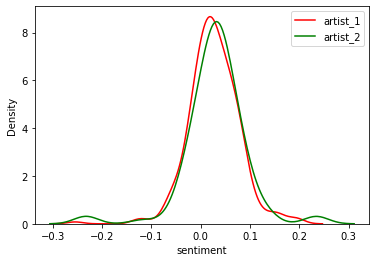

In [62]:
sns.kdeplot(df_senti1['sentiment'],label='artist_1',color='red')
sns.kdeplot(df_senti2['sentiment'],label='artist_2',color='green')
plt.legend()
plt.show()

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. 

In [63]:
pos_emoj = ['😂','❤️','😍','♥️','😊','💕','😘','😁','☺️','🙏']
neg_emoj = ['😔','😭','😒','😩','😢','😳','😞','😱','😡','😫']

In [64]:
def get_sentiment_tweet(word_list):
    senti_pos = 0
    senti_neg = 0
    if len(word_list)==0:
        return 0
    for i in word_list:
        if i in pos_neg_dict:
            if pos_neg_dict[i]==1:
                senti_pos = senti_pos + 1
            else:
                senti_neg = senti_neg + 1
        elif i in pos_emoj+neg_emoj:
            if i in pos_emoj:
                senti_pos = senti_pos + 1
            else:
                senti_neg = senti_neg + 1

    return (senti_pos-senti_neg)/len(word_list)

In [65]:
# your code here
df_twitter_robyn = df_twitter_robyn[:5000]
df_twitter_cher = df_twitter_cher[:5000]

df_twitter_robyn.dropna(inplace=True)
df_twitter_cher.dropna(inplace=True)

In [66]:
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    token = text.split()
    return token

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return tokens

In [67]:
my_pipeline = [str.lower, remove_punctuation, tokenize]

In [68]:
df_twitter_cher["tokens"] = df_twitter_cher["description"].apply(prepare,pipeline=my_pipeline)
df_twitter_robyn["tokens"] = df_twitter_robyn["description"].apply(prepare,pipeline=my_pipeline)

In [69]:
df_twitter_cher['sentiment'] = df_twitter_cher['tokens'].apply(lambda x: get_sentiment_tweet(x))
df_twitter_robyn['sentiment'] = df_twitter_robyn['tokens'].apply(lambda x: get_sentiment_tweet(x))

In [70]:
df_twitter_robyn['sentiment'].mean()

0.05036156180477983

In [71]:
df_twitter_cher['sentiment'].mean()

0.054026638230187954

Q: What is the average sentiment of your two artists? 

A: for robyn, its 0.05036 and for cher its 0.05402

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: ❤️ is the most popular for both the artist

In [72]:
from collections import Counter

In [73]:
Counter([i for i in sum(df_twitter_robyn['tokens'],[]) if i in pos_emoj])

Counter({'♥️': 3, '❤️': 20, '💕': 7, '😍': 1, '😁': 2, '😂': 2, '😘': 1, '😊': 3})

In [74]:
Counter([i for i in sum(df_twitter_cher['tokens'],[]) if i in pos_emoj])

Counter({'❤️': 22,
         '♥️': 6,
         '😍': 3,
         '😂': 3,
         '🙏': 3,
         '😘': 3,
         '😊': 1,
         '💕': 4,
         '😁': 1,
         '☺️': 1})